# Question 10

In [8]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly)

In [5]:
Carseats = load_data('Carseats')
Carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


## Part A
Fit a multiple regression model to predict `Sales` using `Price`, `Urban`, and `US`.

In [6]:
y = Carseats['Sales']
X = MS(['Price', 'Urban', 'US']).fit_transform(Carseats)
model1 = sm.OLS(y, X)
results1 = model1.fit()
summarize(results1)


,coef,std err,t,P>|t|
intercept,13.0435,0.651,20.036,0.000
Price,-0.0545,0.005,-10.389,0.000
Urban[Yes],-0.0219,0.272,-0.081,0.936
US[Yes],1.2006,0.259,4.635,0.000


## Part B
Provide an interpretation of each coefficient in the model. Be careful -- some of the variables in the model are qualitative!

$\beta_0$: when price is at 0 and the location is non-urban and outside of the US, the number of sales will be $13.0435.

$\beta_1 \text{(Price)}$: when all other inputs are held constant, increasing the price by one unit will decrease the number of sales by 0.0545.

$\beta_2 \text{(Urban[Yes])}$: when all other inputs are held constant, if the house is urban, it will result in a decrease of 0.0219 from the sales. However, it will have no effect if the house is non-urban.

$\beta_3 \text{(US[Yes])}$: when all other inputs are held constant, if the house is in the US, it will result in an increase of 1.2006 from the sales. However, it will have no effect if the house is not in the US.

## Part C
Write out the model in equation form, being careful to handle the qualitative variables properly.

$$
Y = -0.0545 \times \text{Price} - 0.0219 \times \text{Urban[Yes]} + 1.2006 \times \text{US[Yes]}+ 13.04
$$

## Part D

For which of the predictors can you reject the null hypothesis $H_0: \beta_j = 0$?

You can reject the null hypothesis for price and US. The p-value for both of these terms is much less than the significance level $0.05$ meaning that they have a statistically significant effect on sales. 

## Part E

On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.

In [13]:
X = MS(['Price', 'US']).fit_transform(Carseats)
model2 = sm.OLS(y, X)
results2 = model2.fit()
summarize(results2)

,coef,std err,t,P>|t|
intercept,13.0308,0.631,20.652,0.0
Price,-0.0545,0.005,-10.416,0.0
US[Yes],1.1996,0.258,4.641,0.0


## Part F

How well do the models in (a) and (e) fit the data?

In [18]:
m1_r2 = results1.rsquared
m1_rse = np.sqrt(results1.scale)
m2_r2 = results2.rsquared
m2_rse = np.sqrt(results2.scale)

print(f'Model 1 -- R^2: {m1_r2}, RSE: {m1_rse}')
print(f'Model 2 -- R^2: {m2_r2}, RSE: {m2_rse}')

Model 1 -- R^2: 0.23927539218405547, RSE: 2.4724924402701642
Model 2 -- R^2: 0.23926288842678567, RSE: 2.469396800574444


Neither of the two models fit the data very well. This is shown by the $R^2$ value being around $23\%$ for both of the models. This means that approximately $23\%$ of the variance in `Sales` is explained by `Price`, `US`, and `Urban` (for model 1 only).

## Part G

Using the model from (e), obtain $95\%$ confidence intervals for the coefficient(s). 

In [11]:
results1.conf_int()

                    0          1
intercept   11.763597  14.323341
Price       -0.064764  -0.044154
Urban[Yes]  -0.555973   0.512141
US[Yes]      0.691304   1.709841


## Part H

Is there evidence of outliers of high leverage observations in the model from (e)?

42

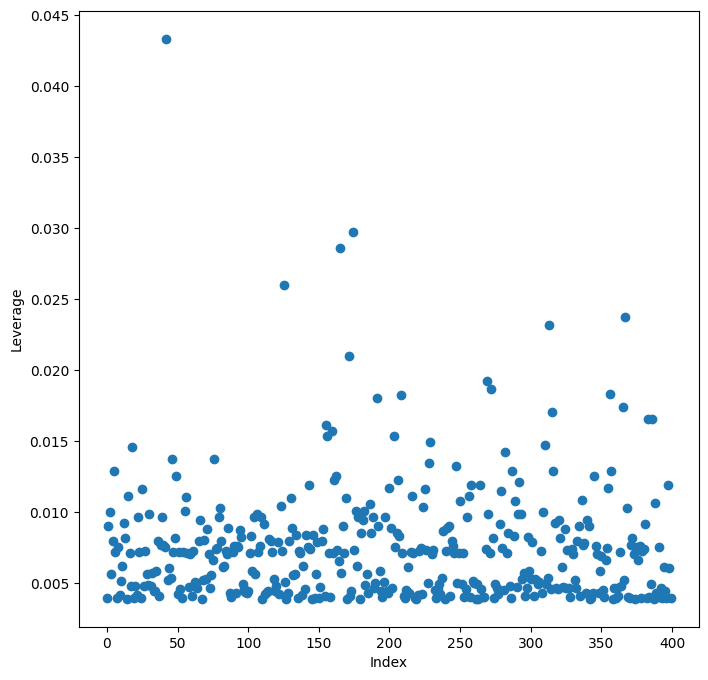

In [19]:
infl = results2.get_influence()
ax = subplots(figsize=(8, 8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

In [23]:
residuals = infl.resid_studentized_internal
max_residual_index = np.where(np.abs(residuals) > 3)[0]

len(max_residual_index)

0

Although there appear to be some higher leverage points (as shown by the graph above), none of those points have a studentized residual of more than 3. This means that there are unlikely to be any outliers.  